In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/drive/My Drive/Kesked kup/train_age_dataset.csv")

In [ ]:
df.shape

(488877, 27)

In [ ]:
df

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.463330,34.160000,53.996091,0,0.000000,0.200000,0.000000,0.041667,0.025000,0.000000,0.000000,0.175000,0.033333,0.000000,1
1,405231,51100441,2,2,0.000000,0.000,0.00,0,0.0,0.0,0.076923,0.153846,0.429468,15.285714,96.231625,0,0.008475,0.093220,0.000000,0.012712,0.018644,0.000000,0.084746,0.000000,0.033898,82.500000,2
2,57867,6887426,2,1,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.341657,22.000000,83.051415,0,0.000000,0.002786,0.000000,0.000000,0.000557,0.000000,0.002786,0.000000,0.000000,0.000000,1
3,272618,50742404,2,1,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.005735,3.000000,523.080000,0,0.000000,0.008403,0.000000,0.000000,0.001681,0.000000,0.000000,0.000000,0.008403,0.000000,1
4,251123,45589200,2,2,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.456549,12.333333,53.766640,0,0.000000,0.204918,0.000000,0.000000,0.049180,0.000000,0.008197,0.057377,0.180328,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488872,535266,38983571,2,2,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.300000,0.422837,8.714286,56.783167,0,0.008000,0.064000,0.000000,0.012000,0.006400,0.000000,0.008000,0.000000,0.048000,195.000000,1
488873,36706,53264639,1,1,0.017241,0.000,0.00,0,0.0,0.0,0.000000,0.012195,0.668494,35.662921,69.031216,2,0.051724,2.043103,0.017241,0.301724,0.339655,0.068966,0.922414,0.137931,1.172414,188.742857,4
488874,31570,44693578,1,1,0.229508,1.625,2.25,0,0.0,0.0,0.000000,0.094340,0.579213,13.444444,50.611380,0,0.016393,0.409836,0.000000,0.000000,0.118033,0.000000,0.049180,0.237705,0.303279,184.880000,4
488875,239209,42760145,2,1,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.221303,9.578947,131.188182,0,0.000000,0.113821,0.000000,0.000000,0.030894,0.000000,0.024390,0.130081,0.000000,0.000000,1


In [ ]:
#OneHotEncoding
df = pd.get_dummies(df, columns = ['gender', 'tier'])
df

,Unnamed: 0,userId,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group,gender_1,gender_2,tier_1,tier_2,tier_3
0,265153,48958844,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.463330,34.160000,53.996091,0,0.000000,0.200000,0.000000,0.041667,0.025000,0.000000,0.000000,0.175000,0.033333,0.000000,1,1,0,0,1,0
1,405231,51100441,0.000000,0.000,0.00,0,0.0,0.0,0.076923,0.153846,0.429468,15.285714,96.231625,0,0.008475,0.093220,0.000000,0.012712,0.018644,0.000000,0.084746,0.000000,0.033898,82.500000,2,0,1,0,1,0
2,57867,6887426,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.341657,22.000000,83.051415,0,0.000000,0.002786,0.000000,0.000000,0.000557,0.000000,0.002786,0.000000,0.000000,0.000000,1,1,0,0,1,0
3,272618,50742404,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.005735,3.000000,523.080000,0,0.000000,0.008403,0.000000,0.000000,0.001681,0.000000,0.000000,0.000000,0.008403,0.000000,1,1,0,0,1,0
4,251123,45589200,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.456549,12.333333,53.766640,0,0.000000,0.204918,0.000000,0.000000,0.049180,0.000000,0.008197,0.057377,0.180328,0.000000,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488872,535266,38983571,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.300000,0.422837,8.714286,56.783167,0,0.008000,0.064000,0.000000,0.012000,0.006400,0.000000,0.008000,0.000000,0.048000,195.000000,1,0,1,0,1,0
488873,36706,53264639,0.017241,0.000,0.00,0,0.0,0.0,0.000000,0.012195,0.668494,35.662921,69.031216,2,0.051724,2.043103,0.017241,0.301724,0.339655,0.068966,0.922414,0.137931,1.172414,188.742857,4,1,0,1,0,0
488874,31570,44693578,0.229508,1.625,2.25,0,0.0,0.0,0.000000,0.094340,0.579213,13.444444,50.611380,0,0.016393,0.409836,0.000000,0.000000,0.118033,0.000000,0.049180,0.237705,0.303279,184.880000,4,1,0,1,0,0
488875,239209,42760145,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.221303,9.578947,131.188182,0,0.000000,0.113821,0.000000,0.000000,0.030894,0.000000,0.024390,0.130081,0.000000,0.000000,1,1,0,0,1,0


In [ ]:
del df['Unnamed: 0']   #data without the first column
del df['userId']   #data without the first column
target = df['age_group']  #separating the target columns
del df['age_group']  #data without the target columns

In [ ]:
df

,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,gender_1,gender_2,tier_1,tier_2,tier_3
0,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.463330,34.160000,53.996091,0,0.000000,0.200000,0.000000,0.041667,0.025000,0.000000,0.000000,0.175000,0.033333,0.000000,1,0,0,1,0
1,0.000000,0.000,0.00,0,0.0,0.0,0.076923,0.153846,0.429468,15.285714,96.231625,0,0.008475,0.093220,0.000000,0.012712,0.018644,0.000000,0.084746,0.000000,0.033898,82.500000,0,1,0,1,0
2,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.341657,22.000000,83.051415,0,0.000000,0.002786,0.000000,0.000000,0.000557,0.000000,0.002786,0.000000,0.000000,0.000000,1,0,0,1,0
3,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.005735,3.000000,523.080000,0,0.000000,0.008403,0.000000,0.000000,0.001681,0.000000,0.000000,0.000000,0.008403,0.000000,1,0,0,1,0
4,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.456549,12.333333,53.766640,0,0.000000,0.204918,0.000000,0.000000,0.049180,0.000000,0.008197,0.057377,0.180328,0.000000,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488872,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.300000,0.422837,8.714286,56.783167,0,0.008000,0.064000,0.000000,0.012000,0.006400,0.000000,0.008000,0.000000,0.048000,195.000000,0,1,0,1,0
488873,0.017241,0.000,0.00,0,0.0,0.0,0.000000,0.012195,0.668494,35.662921,69.031216,2,0.051724,2.043103,0.017241,0.301724,0.339655,0.068966,0.922414,0.137931,1.172414,188.742857,1,0,1,0,0
488874,0.229508,1.625,2.25,0,0.0,0.0,0.000000,0.094340,0.579213,13.444444,50.611380,0,0.016393,0.409836,0.000000,0.000000,0.118033,0.000000,0.049180,0.237705,0.303279,184.880000,1,0,1,0,0
488875,0.000000,0.000,0.00,0,0.0,0.0,0.000000,0.000000,0.221303,9.578947,131.188182,0,0.000000,0.113821,0.000000,0.000000,0.030894,0.000000,0.024390,0.130081,0.000000,0.000000,1,0,0,1,0


In [ ]:
df.shape

(488877, 27)

In [ ]:
target

0         1
1         2
2         1
3         1
4         1
         ..
488872    1
488873    4
488874    4
488875    1
488876    1
Name: age_group, Length: 488877, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( df, target, test_size = 0.3)
x_validation, x_test, y_validation, y_test = train_test_split( x_test, y_test, test_size = 0.33)

In [ ]:
x_train

,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,gender_1,gender_2,tier_1,tier_2,tier_3
361326,0.000000,0.0,0.00000,0,0.0,0.0,0.0,0.000000,0.855439,20.285714,14.884429,0,0.000000,0.074468,0.000000,0.000000,0.014894,0.00000,0.000000,0.074468,0.000000,0.000000,1,0,0,1,0
81762,0.000000,0.0,0.00000,0,0.0,0.0,0.0,0.000000,0.529612,7.750000,50.334000,0,0.000000,0.037736,0.000000,0.004717,0.005660,0.00000,0.000000,0.037736,0.000000,0.000000,1,0,1,0,0
110057,0.032000,2.0,3.00000,0,0.0,0.0,0.0,0.011905,0.373241,10.860000,58.678732,0,0.008000,0.656000,0.000000,0.400000,0.000000,0.00000,0.584000,0.032000,0.184000,0.000000,1,0,0,1,0
138865,0.000000,0.0,0.00000,0,0.0,0.0,0.0,0.000000,0.267440,26.000000,149.292250,0,0.000000,0.102362,0.000000,0.000000,0.022047,0.00000,0.000000,0.110236,0.000000,0.000000,0,1,1,0,0
212205,0.063943,3.0,2.52381,0,0.0,0.0,0.0,0.090909,0.417711,84.257143,254.469546,2,0.008881,0.024867,0.003552,0.001776,0.011723,0.01421,0.003552,0.033748,0.010657,214.733333,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196748,0.000000,0.0,0.00000,0,0.0,0.0,0.0,0.000000,0.188526,4.787879,64.848913,0,0.000000,0.280899,0.000000,0.185393,0.000000,0.00000,0.078652,0.292135,0.000000,0.000000,1,0,0,1,0
305822,0.098361,0.0,0.00000,6,0.0,0.0,0.0,0.060000,0.505590,13.983871,55.565688,1,0.032787,2.000000,0.008197,0.000000,0.508197,0.00000,1.704918,0.532787,0.303279,255.666667,1,0,0,1,0
121289,0.000000,0.0,0.00000,0,0.0,0.0,0.0,0.000000,0.496527,10.608247,44.040389,0,0.000000,0.865385,0.000000,0.466346,0.000000,0.00000,0.932692,0.000000,0.000000,0.000000,1,0,0,1,0
128437,0.000000,0.0,0.00000,0,0.0,0.0,0.0,0.000000,0.010539,2.000000,189.780000,0,0.000000,0.014286,0.000000,0.000000,0.002857,0.00000,0.014286,0.000000,0.000000,0.000000,1,0,0,1,0


In [ ]:
y_train

361326    1
81762     1
110057    4
138865    1
212205    4
         ..
196748    1
305822    3
121289    1
128437    1
38575     2
Name: age_group, Length: 342213, dtype: int64

In [ ]:
#Scale some features to between 0 and 1
mms=MinMaxScaler()
x_train[['followers_avg_age','following_avg_age', 'max_repetitive_punc', 'num_of_hashtags_per_action', 'emoji_count_per_action', 'punctuations_per_action', 'number_of_words_per_action', 'avgCompletion', 'avgTimeSpent', 'avgDuration',	'avgComments', 'creations',	'content_views',	'weekends_trails_watched_per_day',	'weekdays_trails_watched_per_day',	'slot1_trails_watched_per_day',	'slot2_trails_watched_per_day',	'slot3_trails_watched_per_day',	'slot4_trails_watched_per_day',	'avgt2']] = mms.fit_transform(x_train[['followers_avg_age','following_avg_age', 'max_repetitive_punc', 'num_of_hashtags_per_action', 'emoji_count_per_action', 'punctuations_per_action', 'number_of_words_per_action', 'avgCompletion', 'avgTimeSpent', 'avgDuration',	'avgComments', 'creations',	'content_views',	'weekends_trails_watched_per_day',	'weekdays_trails_watched_per_day',	'slot1_trails_watched_per_day',	'slot2_trails_watched_per_day',	'slot3_trails_watched_per_day',	'slot4_trails_watched_per_day',	'avgt2']])
x_validation[['followers_avg_age','following_avg_age', 'max_repetitive_punc', 'num_of_hashtags_per_action', 'emoji_count_per_action', 'punctuations_per_action', 'number_of_words_per_action', 'avgCompletion', 'avgTimeSpent', 'avgDuration',	'avgComments', 'creations',	'content_views',	'weekends_trails_watched_per_day',	'weekdays_trails_watched_per_day',	'slot1_trails_watched_per_day',	'slot2_trails_watched_per_day',	'slot3_trails_watched_per_day',	'slot4_trails_watched_per_day', 'avgt2']] = mms.transform(x_validation[['followers_avg_age','following_avg_age', 'max_repetitive_punc', 'num_of_hashtags_per_action', 'emoji_count_per_action', 'punctuations_per_action', 'number_of_words_per_action', 'avgCompletion', 'avgTimeSpent', 'avgDuration',	'avgComments', 'creations',	'content_views',	'weekends_trails_watched_per_day',	'weekdays_trails_watched_per_day',	'slot1_trails_watched_per_day',	'slot2_trails_watched_per_day',	'slot3_trails_watched_per_day',	'slot4_trails_watched_per_day',	'avgt2']])
x_test[['followers_avg_age','following_avg_age', 'max_repetitive_punc', 'num_of_hashtags_per_action', 'emoji_count_per_action', 'punctuations_per_action', 'number_of_words_per_action', 'avgCompletion', 'avgTimeSpent', 'avgDuration',	'avgComments', 'creations',	'content_views',	'weekends_trails_watched_per_day',	'weekdays_trails_watched_per_day',	'slot1_trails_watched_per_day',	'slot2_trails_watched_per_day',	'slot3_trails_watched_per_day',	'slot4_trails_watched_per_day', 'avgt2']] = mms.transform(x_test[['followers_avg_age','following_avg_age', 'max_repetitive_punc', 'num_of_hashtags_per_action', 'emoji_count_per_action', 'punctuations_per_action', 'number_of_words_per_action', 'avgCompletion', 'avgTimeSpent', 'avgDuration',	'avgComments', 'creations',	'content_views',	'weekends_trails_watched_per_day',	'weekdays_trails_watched_per_day',	'slot1_trails_watched_per_day',	'slot2_trails_watched_per_day',	'slot3_trails_watched_per_day',	'slot4_trails_watched_per_day',	'avgt2']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
x_train

,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,gender_1,gender_2,tier_1,tier_2,tier_3
361326,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.855296,3.269736e-06,0.001896,0.000000,0.000000,0.000973,0.000000,0.000000,0.000794,0.000000,0.000000,0.001652,0.000000,0.000000,1,0,0,1,0
81762,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.529144,1.144408e-06,0.006597,0.000000,0.000000,0.000487,0.000000,0.000274,0.000302,0.000000,0.000000,0.000837,0.000000,0.000000,1,0,1,0,0
110057,0.032000,0.50,0.750000,0.000000,0.0,0.0,0.0,0.000045,0.372618,1.671683e-06,0.007704,0.000000,0.000136,0.008658,0.000000,0.023253,0.000000,0.000000,0.020927,0.000710,0.004933,0.000000,1,0,0,1,0
138865,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.266712,4.238547e-06,0.019721,0.000000,0.000000,0.001341,0.000000,0.000000,0.001175,0.000000,0.000000,0.002445,0.000000,0.000000,0,1,1,0,0
212205,0.063943,0.75,0.630952,0.000000,0.0,0.0,0.0,0.000346,0.417132,1.411557e-05,0.033669,0.000895,0.000151,0.000317,0.003552,0.000103,0.000625,0.000725,0.000127,0.000749,0.000286,0.005463,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196748,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.187719,6.422041e-07,0.008522,0.000000,0.000000,0.003701,0.000000,0.010778,0.000000,0.000000,0.002818,0.006480,0.000000,0.000000,1,0,0,1,0
305822,0.098361,0.00,0.000000,0.028846,0.0,0.0,0.0,0.000228,0.505098,2.201310e-06,0.007291,0.000448,0.000558,0.026422,0.008197,0.000000,0.027095,0.000000,0.061095,0.011818,0.008130,0.006505,1,0,0,1,0
121289,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.496027,1.629000e-06,0.005763,0.000000,0.000000,0.011426,0.000000,0.027110,0.000000,0.000000,0.033423,0.000000,0.000000,0.000000,1,0,0,1,0
128437,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.009555,1.695419e-07,0.025090,0.000000,0.000000,0.000177,0.000000,0.000000,0.000152,0.000000,0.000512,0.000000,0.000000,0.000000,1,0,0,1,0


In [ ]:
x_train = x_train.values
x_test = x_test.values
x_validation = x_validation.values

In [ ]:
from keras.utils.np_utils import to_categorical

y_train = pd.DataFrame(to_categorical(y_train))
del y_train[0]
y_validation = pd.DataFrame(to_categorical(y_validation))
del y_validation[0]
y_test = pd.DataFrame(to_categorical(y_test))
del y_test[0]

In [ ]:
y_train = y_train.values
y_test = y_test.values
y_validation = y_validation.values

In [ ]:
y_train

array([1, 1, 4, ..., 1, 1, 2])

In [ ]:
#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

model1 = keras.Sequential(
    [
        layers.Dense(20, activation="tanh", name="layer1", input_shape=(x_train.shape[1],), kernel_regularizer='l1_l2'),
        layers.Dense(15, activation="tanh", name="layer2", kernel_regularizer='l1_l2'),
        layers.Dense(10, activation="tanh", name="layer3", kernel_regularizer='l1_l2'),
        layers.Dense(8, activation="tanh", name="layer4", kernel_regularizer='l1_l2'),
        layers.Dense(4, activation="softmax", name="layer5", kernel_regularizer='l1_l2'),
    ]
)
model1.summary()

model1.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=model1.fit(x_train, y_train, epochs=20, validation_data=(x_validation,y_validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                560       
_________________________________________________________________
layer2 (Dense)               (None, 15)                315       
_________________________________________________________________
layer3 (Dense)               (None, 10)                160       
_________________________________________________________________
layer4 (Dense)               (None, 8)                 88        
_________________________________________________________________
layer5 (Dense)               (None, 4)                 36        
Total params: 1,159
Trainable params: 1,159
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                560       
_________________________________________________________________
layer2 (Dense)               (None, 15)                315       
_________________________________________________________________
layer3 (Dense)               (None, 10)                160       
_________________________________________________________________
layer4 (Dense)               (None, 8)                 88        
_________________________________________________________________
layer5 (Dense)               (None, 4)                 36        
Total params: 1,159
Trainable params: 1,159
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1337/1337 [==============================] - 2s 2ms/step - loss: 0.8611 - accuracy: 0.6329 - val_loss: 0.76

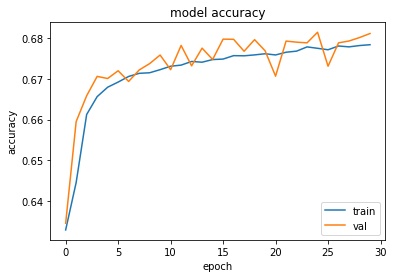

In [ ]:
#regularization, epoch

#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

model2 = keras.Sequential(
    [
        layers.Dense(20, activation="tanh", name="layer1", input_shape=(x_train.shape[1],)),
        layers.Dense(15, activation="tanh", name="layer2"),
        layers.Dense(10, activation="tanh", name="layer3"),
        layers.Dense(8, activation="tanh", name="layer4"),
        layers.Dense(4, activation="softmax", name="layer5"),
    ]
)
model2.summary()

model2.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=model2.fit(x_train, y_train, epochs=30, validation_data=(x_validation,y_validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                560       
_________________________________________________________________
layer2 (Dense)               (None, 15)                315       
_________________________________________________________________
layer3 (Dense)               (None, 10)                160       
_________________________________________________________________
layer4 (Dense)               (None, 8)                 88        
_________________________________________________________________
layer5 (Dense)               (None, 4)                 36        
Total params: 1,159
Trainable params: 1,159
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1337/1337 [==============================] - 2s 2ms/step - loss: 0.8576 - accuracy: 0.6306 - val_loss: 0.74

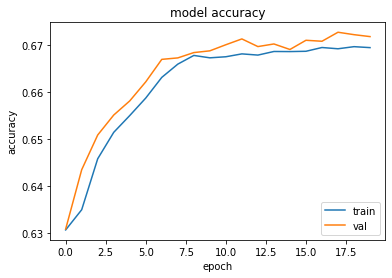

In [ ]:
#activation

#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

model3 = keras.Sequential(
    [
        layers.Dense(20, activation="relu", name="layer1", input_shape=(x_train.shape[1],)),
        layers.Dense(15, activation="relu", name="layer2"),
        layers.Dense(10, activation="relu", name="layer3"),
        layers.Dense(8, activation="relu", name="layer4"),
        layers.Dense(4, activation="softmax", name="layer5"),
    ]
)
model3.summary()

model3.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=model3.fit(x_train, y_train, epochs=20, validation_data=(x_validation,y_validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                560       
_________________________________________________________________
layer2 (Dense)               (None, 15)                315       
_________________________________________________________________
layer3 (Dense)               (None, 10)                160       
_________________________________________________________________
layer4 (Dense)               (None, 8)                 88        
_________________________________________________________________
layer5 (Dense)               (None, 4)                 36        
Total params: 1,159
Trainable params: 1,159
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1337/1337 [==============================] - 3s 2ms/step - loss: 0.8568 - accuracy: 0.6362 - val_loss: 0.73

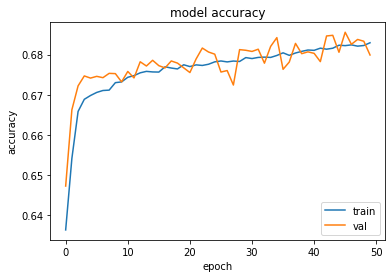

In [ ]:
#epoch

#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

model4 = keras.Sequential(
    [
        layers.Dense(20, activation="tanh", name="layer1", input_shape=(x_train.shape[1],)),
        layers.Dense(15, activation="tanh", name="layer2"),
        layers.Dense(10, activation="tanh", name="layer3"),
        layers.Dense(8, activation="tanh", name="layer4"),
        layers.Dense(4, activation="softmax", name="layer5"),
    ]
)
model4.summary()

model4.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=model4.fit(x_train, y_train, epochs=50, validation_data=(x_validation,y_validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 35)                980       
_________________________________________________________________
layer2 (Dense)               (None, 23)                828       
_________________________________________________________________
layer3 (Dense)               (None, 16)                384       
_________________________________________________________________
layer4 (Dense)               (None, 10)                170       
_________________________________________________________________
layer5 (Dense)               (None, 7)                 77        
_________________________________________________________________
layer6 (Dense)               (None, 4)                 32        
Total params: 2,471
Trainable params: 2,471
Non-trainable params: 0
______________________________________________________

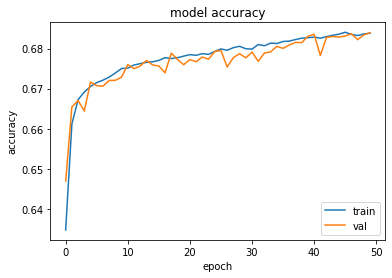

In [ ]:
#no. of nodes, layers

#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

model5 = keras.Sequential(
    [
        layers.Dense(35, activation="tanh", name="layer1", input_shape=(x_train.shape[1],)),
        layers.Dense(23, activation="tanh", name="layer2"),
        layers.Dense(16, activation="tanh", name="layer3"),
        layers.Dense(10, activation="tanh", name="layer4"),
        layers.Dense(7, activation="tanh", name="layer5"),
        layers.Dense(4, activation="softmax", name="layer6"),
    ]
)
model5.summary()

model5.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=model5.fit(x_train, y_train, epochs=50, validation_data=(x_validation,y_validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 35)                980       
_________________________________________________________________
layer2 (Dense)               (None, 23)                828       
_________________________________________________________________
layer3 (Dense)               (None, 16)                384       
_________________________________________________________________
layer4 (Dense)               (None, 10)                170       
_________________________________________________________________
layer5 (Dense)               (None, 7)                 77        
_________________________________________________________________
layer6 (Dense)               (None, 4)                 32        
Total params: 2,471
Trainable params: 2,471
Non-trainable params: 0
____________________________________________________

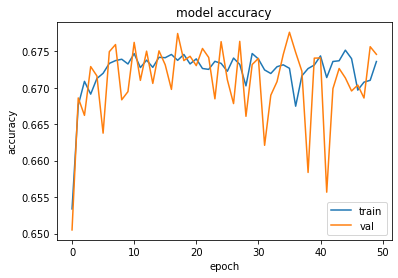

In [ ]:
#learning rate

#Train the model
opt1 = keras.optimizers.Adam(learning_rate=0.01)
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

model6 = keras.Sequential(
    [
        layers.Dense(35, activation="tanh", name="layer1", input_shape=(x_train.shape[1],)),
        layers.Dense(23, activation="tanh", name="layer2"),
        layers.Dense(16, activation="tanh", name="layer3"),
        layers.Dense(10, activation="tanh", name="layer4"),
        layers.Dense(7, activation="tanh", name="layer5"),
        layers.Dense(4, activation="softmax", name="layer6"),
    ]
)
model6.summary()

model6.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=model6.fit(x_train, y_train, epochs=50, validation_data=(x_validation,y_validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 35)                980       
_________________________________________________________________
layer2 (Dense)               (None, 23)                828       
_________________________________________________________________
layer3 (Dense)               (None, 16)                384       
_________________________________________________________________
layer4 (Dense)               (None, 10)                170       
_________________________________________________________________
layer5 (Dense)               (None, 7)                 77        
_________________________________________________________________
layer6 (Dense)               (None, 4)                 32        
Total params: 2,471
Trainable params: 2,471
Non-trainable params: 0
____________________________________________________

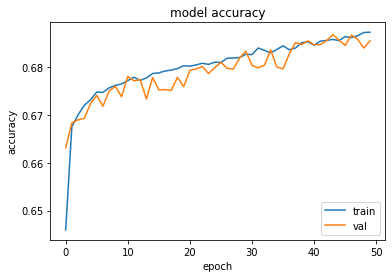

In [ ]:
#learning rate bac to og, batch size less

#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

model7 = keras.Sequential(
    [
        layers.Dense(35, activation="tanh", name="layer1", input_shape=(x_train.shape[1],)),
        layers.Dense(23, activation="tanh", name="layer2"),
        layers.Dense(16, activation="tanh", name="layer3"),
        layers.Dense(10, activation="tanh", name="layer4"),
        layers.Dense(7, activation="tanh", name="layer5"),
        layers.Dense(4, activation="softmax", name="layer6"),
    ]
)
model7.summary()

model7.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=model7.fit(x_train, y_train, epochs=50, validation_data=(x_validation,y_validation), batch_size=128)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 35)                980       
_________________________________________________________________
layer2 (Dense)               (None, 23)                828       
_________________________________________________________________
layer3 (Dense)               (None, 16)                384       
_________________________________________________________________
layer4 (Dense)               (None, 10)                170       
_________________________________________________________________
layer5 (Dense)               (None, 7)                 77        
_________________________________________________________________
layer6 (Dense)               (None, 4)                 32        
Total params: 2,471
Trainable params: 2,471
Non-trainable params: 0
____________________________________________________

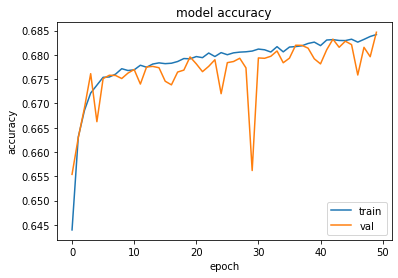

In [ ]:
#try opt2

#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

model8 = keras.Sequential(
    [
        layers.Dense(35, activation="tanh", name="layer1", input_shape=(x_train.shape[1],)),
        layers.Dense(23, activation="tanh", name="layer2"),
        layers.Dense(16, activation="tanh", name="layer3"),
        layers.Dense(10, activation="tanh", name="layer4"),
        layers.Dense(7, activation="tanh", name="layer5"),
        layers.Dense(4, activation="softmax", name="layer6"),
    ]
)
model8.summary()

model8.compile(optimizer=opt2, loss=los, metrics=["accuracy"])
history=model8.fit(x_train, y_train, epochs=50, validation_data=(x_validation,y_validation), batch_size=128)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 35)                980       
_________________________________________________________________
layer3 (Dense)               (None, 16)                576       
_________________________________________________________________
layer5 (Dense)               (None, 7)                 119       
_________________________________________________________________
layer6 (Dense)               (None, 4)                 32        
Total params: 1,707
Trainable params: 1,707
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2674/2674 [==============================] - 4s 2ms/step - loss: 0.9024 - accuracy: 0.6427 - val_loss: 0.7740 - val_accuracy: 0.6511
Epoch 2/50
2674/2674 [==============================] - 4s 1ms/step - loss: 0.7355 - accuracy: 0.6603 - va

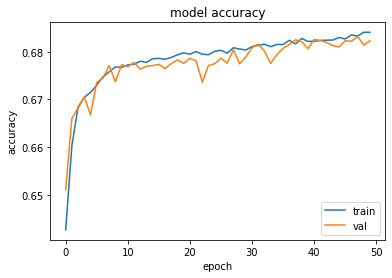

In [ ]:
#nah opt 1 hi, redoocing params

#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

model9 = keras.Sequential(
    [
        layers.Dense(35, activation="tanh", name="layer1", input_shape=(x_train.shape[1],)),
#        layers.Dense(23, activation="tanh", name="layer2"),
        layers.Dense(16, activation="tanh", name="layer3"),
#        layers.Dense(10, activation="tanh", name="layer4"),
        layers.Dense(7, activation="tanh", name="layer5"),
        layers.Dense(4, activation="softmax", name="layer6"),
    ]
)
model9.summary()

model9.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=model9.fit(x_train, y_train, epochs=50, validation_data=(x_validation,y_validation), batch_size=128)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 40)                1120      
_________________________________________________________________
layer2 (Dense)               (None, 35)                1435      
_________________________________________________________________
layer3 (Dense)               (None, 23)                828       
_________________________________________________________________
layer4 (Dense)               (None, 16)                384       
_________________________________________________________________
layer5 (Dense)               (None, 10)                170       
_________________________________________________________________
layer6 (Dense)               (None, 7)                 77        
_________________________________________________________________
layer7 (Dense)               (None, 4)                

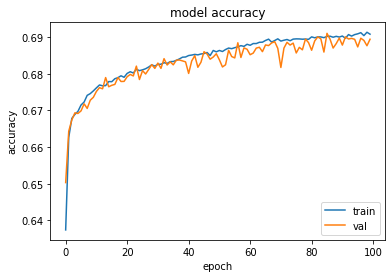

In [ ]:
#inkrijing params, batch chije, epok

#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

modelj = keras.Sequential(
    [
        layers.Dense(40, activation="tanh", name="layer1", input_shape=(x_train.shape[1],)),
        layers.Dense(35, activation="tanh", name="layer2"),
        layers.Dense(23, activation="tanh", name="layer3"),
        layers.Dense(16, activation="tanh", name="layer4"),
        layers.Dense(10, activation="tanh", name="layer5"),
        layers.Dense(7, activation="tanh", name="layer6"),
        layers.Dense(4, activation="softmax", name="layer7"),
    ]
)
modelj.summary()

modelj.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=modelj.fit(x_train, y_train, epochs=100, validation_data=(x_validation,y_validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 40)                1120      
_________________________________________________________________
layer2 (Dense)               (None, 35)                1435      
_________________________________________________________________
layer3 (Dense)               (None, 40)                1440      
_________________________________________________________________
layer4 (Dense)               (None, 23)                943       
_________________________________________________________________
layer5 (Dense)               (None, 16)                384       
_________________________________________________________________
layer6 (Dense)               (None, 10)                170       
_________________________________________________________________
layer7 (Dense)               (None, 4)               

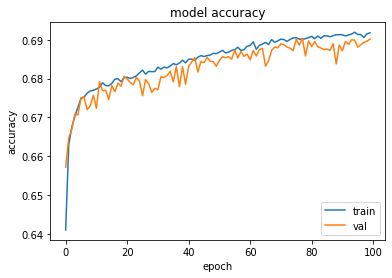

In [ ]:
#model shape

#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

modelk = keras.Sequential(
    [
        layers.Dense(40, activation="tanh", name="layer1", input_shape=(x_train.shape[1],)),
        layers.Dense(35, activation="tanh", name="layer2"),
        layers.Dense(40, activation="tanh", name="layer3"),
        layers.Dense(23, activation="tanh", name="layer4"),
        layers.Dense(16, activation="tanh", name="layer5"),
        layers.Dense(10, activation="tanh", name="layer6"),
        layers.Dense(4, activation="softmax", name="layer7"),
    ]
)
modelk.summary()

modelk.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=modelk.fit(x_train, y_train, epochs=100, validation_data=(x_validation,y_validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 40)                1120      
_________________________________________________________________
layer2 (Dense)               (None, 35)                1435      
_________________________________________________________________
layer3 (Dense)               (None, 23)                828       
_________________________________________________________________
layer4 (Dense)               (None, 16)                384       
_________________________________________________________________
layer5 (Dense)               (None, 10)                170       
_________________________________________________________________
layer6 (Dense)               (None, 7)                 77        
_________________________________________________________________
layer7 (Dense)               (None, 4)               

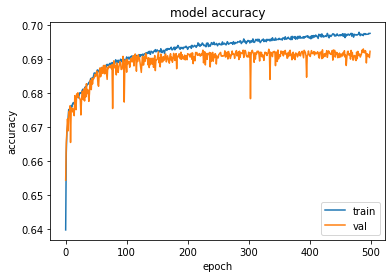

In [ ]:
#og params, inkrijing epoks

#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

modell = keras.Sequential(
    [
        layers.Dense(40, activation="tanh", name="layer1", input_shape=(x_train.shape[1],)),
        layers.Dense(35, activation="tanh", name="layer2"),
        layers.Dense(23, activation="tanh", name="layer3"),
        layers.Dense(16, activation="tanh", name="layer4"),
        layers.Dense(10, activation="tanh", name="layer5"),
        layers.Dense(7, activation="tanh", name="layer6"),
        layers.Dense(4, activation="softmax", name="layer7"),
    ]
)
modell.summary()

modell.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=modell.fit(x_train, y_train, epochs=500, validation_data=(x_validation,y_validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 40)                1120      
_________________________________________________________________
layer2 (Dense)               (None, 35)                1435      
_________________________________________________________________
layer3 (Dense)               (None, 23)                828       
_________________________________________________________________
layer4 (Dense)               (None, 23)                552       
_________________________________________________________________
layer5 (Dense)               (None, 16)                384       
_________________________________________________________________
layer6 (Dense)               (None, 10)                170       
_________________________________________________________________
layer7 (Dense)               (None, 7)               

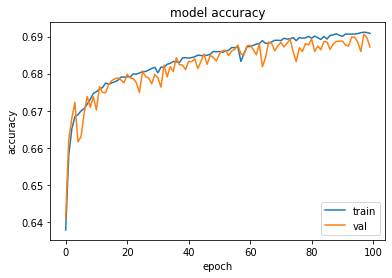

In [ ]:
#100 epoks and inkrijing layers

#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

modelm = keras.Sequential(
    [
        layers.Dense(40, activation="tanh", name="layer1", input_shape=(x_train.shape[1],)),
        layers.Dense(35, activation="tanh", name="layer2"),
        layers.Dense(23, activation="tanh", name="layer3"),
        layers.Dense(23, activation="tanh", name="layer4"),
        layers.Dense(16, activation="tanh", name="layer5"),
        layers.Dense(10, activation="tanh", name="layer6"),
        layers.Dense(7, activation="tanh", name="layer7"),
        layers.Dense(4, activation="softmax", name="layer8"),
    ]
)
modelm.summary()

modelm.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=modelm.fit(x_train, y_train, epochs=100, validation_data=(x_validation,y_validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 40)                1120      
_________________________________________________________________
layer2 (Dense)               (None, 35)                1435      
_________________________________________________________________
layer3 (Dense)               (None, 23)                828       
_________________________________________________________________
layer5 (Dense)               (None, 16)                384       
_________________________________________________________________
layer6 (Dense)               (None, 10)                170       
_________________________________________________________________
layer7 (Dense)               (None, 7)                 77        
_________________________________________________________________
layer8 (Dense)               (None, 4)               

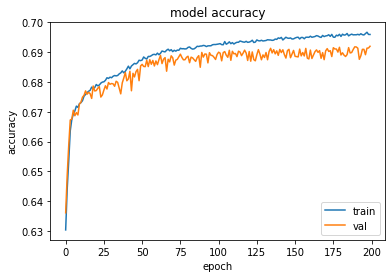

In [ ]:
#nah og layers hi, relu, 200 epoks

#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

modeln = keras.Sequential(
    [
        layers.Dense(40, activation="relu", name="layer1", input_shape=(x_train.shape[1],)),
        layers.Dense(35, activation="relu", name="layer2"),
        layers.Dense(23, activation="relu", name="layer3"),
        layers.Dense(16, activation="relu", name="layer5"),
        layers.Dense(10, activation="relu", name="layer6"),
        layers.Dense(7, activation="relu", name="layer7"),
        layers.Dense(4, activation="softmax", name="layer8"),
    ]
)
modeln.summary()

modeln.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=modeln.fit(x_train, y_train, epochs=200, validation_data=(x_validation,y_validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 40)                1120      
_________________________________________________________________
dropout_15 (Dropout)         (None, 40)                0         
_________________________________________________________________
layer2 (Dense)               (None, 35)                1435      
_________________________________________________________________
dropout_16 (Dropout)         (None, 35)                0         
_________________________________________________________________
layer3 (Dense)               (None, 23)                828       
_________________________________________________________________
dropout_17 (Dropout)         (None, 23)                0         
_________________________________________________________________
layer5 (Dense)               (None, 16)              

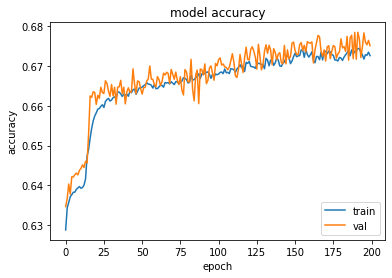

In [ ]:
#Dropout layers

#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

modelo = keras.Sequential(
    [
        layers.Dense(40, activation="relu", name="layer1", input_shape=(x_train.shape[1],)),
        layers.Dropout(0.2),
        layers.Dense(35, activation="relu", name="layer2"),
        layers.Dropout(0.2),
        layers.Dense(23, activation="relu", name="layer3"),
        layers.Dropout(0.2),
        layers.Dense(16, activation="relu", name="layer5"),
        layers.Dropout(0.2),
        layers.Dense(10, activation="relu", name="layer6"),
        layers.Dropout(0.2),
        layers.Dense(7, activation="relu", name="layer7"),
        layers.Dense(4, activation="softmax", name="layer8"),
    ]
)
modelo.summary()

modelo.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=modelo.fit(x_train, y_train, epochs=200, validation_data=(x_validation,y_validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
x__train, x__test, y__train, y__test = train_test_split( df, target, test_size = 0.3)
x__validation, x__test, y__validation, y__test = train_test_split( x__test, y__test, test_size = 0.33)

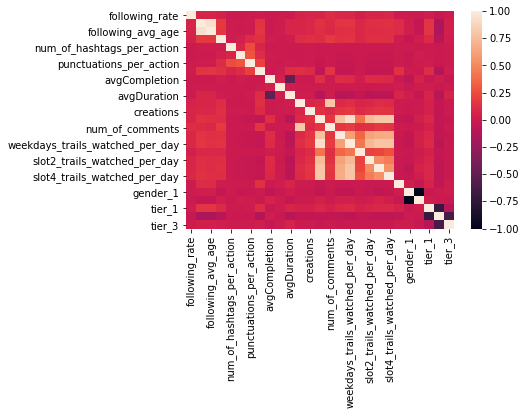

In [ ]:
import seaborn as sn
sn.heatmap(pd.DataFrame(x__train).corr(), annot=False)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
x__train = pca.fit_transform(x__train)
x__validation = pca.transform(x__validation)
x__test = pca.transform(x__test)

In [ ]:
x__train

array([[-1.39481183e-01, -9.84347362e+00, -6.84277983e+01, ...,
         8.19261272e-01,  4.46956677e-02,  1.26012327e-02],
       [-1.64211065e+02,  1.81996415e+02, -5.34717979e+01, ...,
        -2.52346788e-02, -9.22888294e-03,  8.21398181e-03],
       [-4.94867566e+01, -9.65748186e-02,  1.38493007e+01, ...,
         2.07442369e-02, -2.53238169e-02,  3.04847373e-02],
       ...,
       [-1.64940169e+02, -1.40360486e+01, -2.84048035e+01, ...,
        -5.83917246e-03, -1.52565196e-01, -3.68892544e-03],
       [-1.64727682e+02, -1.22083179e+01,  8.42005118e+00, ...,
         8.08212947e-01,  1.22519623e-02,  1.16922060e-02],
       [-1.61598981e+01,  4.49651955e+00,  2.51177516e+02, ...,
        -3.19028440e-02,  4.91014180e-02,  1.69797402e-02]])

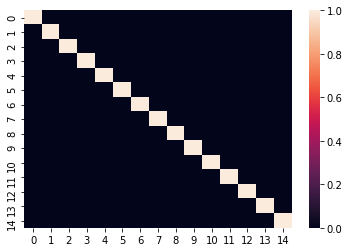

In [ ]:
sn.heatmap(pd.DataFrame(x__train).corr(), annot=False)
plt.show()

In [ ]:
x__train

array([[-1.39481183e-01, -9.84347362e+00, -6.84277983e+01, ...,
         8.19261272e-01,  4.46956677e-02,  1.26012327e-02],
       [-1.64211065e+02,  1.81996415e+02, -5.34717979e+01, ...,
        -2.52346788e-02, -9.22888294e-03,  8.21398181e-03],
       [-4.94867566e+01, -9.65748186e-02,  1.38493007e+01, ...,
         2.07442369e-02, -2.53238169e-02,  3.04847373e-02],
       ...,
       [-1.64940169e+02, -1.40360486e+01, -2.84048035e+01, ...,
        -5.83917246e-03, -1.52565196e-01, -3.68892544e-03],
       [-1.64727682e+02, -1.22083179e+01,  8.42005118e+00, ...,
         8.08212947e-01,  1.22519623e-02,  1.16922060e-02],
       [-1.61598981e+01,  4.49651955e+00,  2.51177516e+02, ...,
        -3.19028440e-02,  4.91014180e-02,  1.69797402e-02]])

In [ ]:
y__train = pd.DataFrame(to_categorical(y__train))
del y__train[0]
y__validation = pd.DataFrame(to_categorical(y__validation))
del y__validation[0]
y__test = pd.DataFrame(to_categorical(y__test))
del y__test[0]

y__train = y__train.values
y__test = y__test.values
y__validation = y__validation.values

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 18)                288       
_________________________________________________________________
layer2 (Dense)               (None, 15)                285       
_________________________________________________________________
layer3 (Dense)               (None, 10)                160       
_________________________________________________________________
layer4 (Dense)               (None, 6)                 66        
_________________________________________________________________
layer5 (Dense)               (None, 4)                 28        
Total params: 827
Trainable params: 827
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1337/1337 [==============================] - 2s 2ms/step - loss: 0.8135 - accuracy: 0.6382 - val_loss: 0.7842 

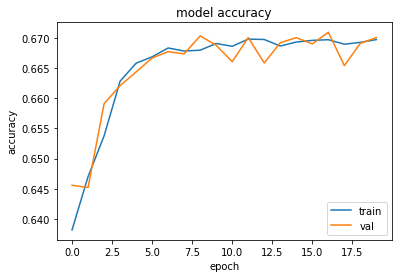

In [ ]:
#Train the model
opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

model_1 = keras.Sequential(
    [
        layers.Dense(18, activation="tanh", name="layer1", input_shape=(x__train.shape[1],)),
        layers.Dense(15, activation="tanh", name="layer2"),
        layers.Dense(10, activation="tanh", name="layer3"),
        layers.Dense(6, activation="tanh", name="layer4"),
        layers.Dense(4, activation="softmax", name="layer5"),
    ]
)
model_1.summary()

model_1.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=model_1.fit(x__train, y__train, epochs=20, validation_data=(x__validation,y__validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 18)                288       
_________________________________________________________________
layer2 (Dense)               (None, 15)                285       
_________________________________________________________________
layer3 (Dense)               (None, 10)                160       
_________________________________________________________________
layer4 (Dense)               (None, 6)                 66        
_________________________________________________________________
layer5 (Dense)               (None, 4)                 28        
Total params: 827
Trainable params: 827
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1337/1337 [==============================] - 2s 2ms/step - loss: 0.8256 - accuracy: 0.6258 - val_loss: 0.7573 

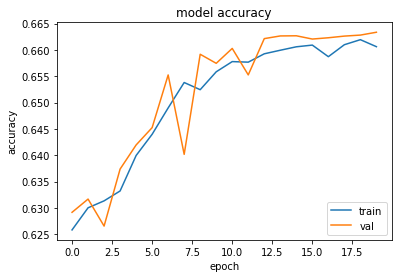

In [ ]:
#relu


opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

model_b = keras.Sequential(
    [
        layers.Dense(18, activation="relu", name="layer1", input_shape=(x__train.shape[1],)),
        layers.Dense(15, activation="relu", name="layer2"),
        layers.Dense(10, activation="relu", name="layer3"),
        layers.Dense(6, activation="relu", name="layer4"),
        layers.Dense(4, activation="softmax", name="layer5"),
    ]
)
model_b.summary()

model_b.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=model_b.fit(x__train, y__train, epochs=20, validation_data=(x__validation,y__validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 18)                288       
_________________________________________________________________
layer2 (Dense)               (None, 15)                285       
_________________________________________________________________
layer3 (Dense)               (None, 10)                160       
_________________________________________________________________
layer4 (Dense)               (None, 6)                 66        
_________________________________________________________________
layer5 (Dense)               (None, 4)                 28        
Total params: 827
Trainable params: 827
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1337/1337 [==============================] - 2s 2ms/step - loss: 1.0519 - accuracy: 0.6305 - val_loss: 0.7718

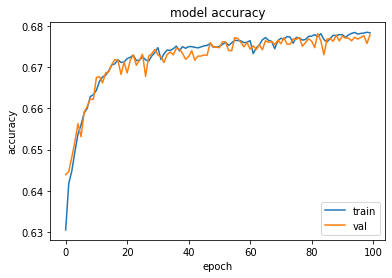

In [ ]:
#epok


opt1 = keras.optimizers.Adam()
opt2 = keras.optimizers.RMSprop()
los = tf.keras.losses.CategoricalCrossentropy()

model_c = keras.Sequential(
    [
        layers.Dense(18, activation="relu", name="layer1", input_shape=(x__train.shape[1],)),
        layers.Dense(15, activation="relu", name="layer2"),
        layers.Dense(10, activation="relu", name="layer3"),
        layers.Dense(6, activation="relu", name="layer4"),
        layers.Dense(4, activation="softmax", name="layer5"),
    ]
)
model_c.summary()

model_c.compile(optimizer=opt1, loss=los, metrics=["accuracy"])
history=model_c.fit(x__train, y__train, epochs=100, validation_data=(x__validation,y__validation), batch_size=256)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
#suport bhektaur maseen teery kara jaye

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', decision_function_shape='ovo') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_validation)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))

Accuracy: 0.6349629569323455


In [ ]:
# :)
# 3 ghante ke baad ye
# :)

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_validation)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))

Accuracy: 0.6457502238866727


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_validation)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly', degree=5, C=1, decision_function_shape='ovo')

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_validation)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))